# ChessVision Example

This notebook demonstrates the end-to-end process of detecting a chess position from an image using the ChessVision pipeline.

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import cv2

from chessvision import ChessVision, constants, utils

In [3]:
import logging

logging.getLogger("chessvision").setLevel(logging.INFO)
logging.getLogger("chessvision").addHandler(logging.StreamHandler())

In [4]:
# Read a test image
test_image_path = constants.DATA_ROOT / "test" / "raw" / "3cb7e9ca-0549-4072-a0ef-ae5ea82174e6.JPG"
img = cv2.imread(str(test_image_path))


## Process the Image with ChessVision Pipeline

In [5]:
cv = ChessVision(lazy_load=False)
result = cv.process_image(img)
print(f"Detected position: {result.position.fen}")

Initializing ChessVision instance...
Using CUDA device
Eager loading models...
Initializing board extraction model...
Loading checkpoint from C:\Project\ChessVision-3LC\weights\best_extractor.pth
Initializing piece classifier model...
Loaded YOLO model from C:\Project\ChessVision-3LC\weights\best_yolo_classifier.pt
Models loaded successfully
Starting image processing pipeline...
Board successfully extracted
Position classification completed
Processing completed in 0.36 seconds


Detected position: 3rrk2/2Pp1P1R/7P/2b2N2/p2pp3/7p/K1Q5/8


## Visualize the Detected Chess Position

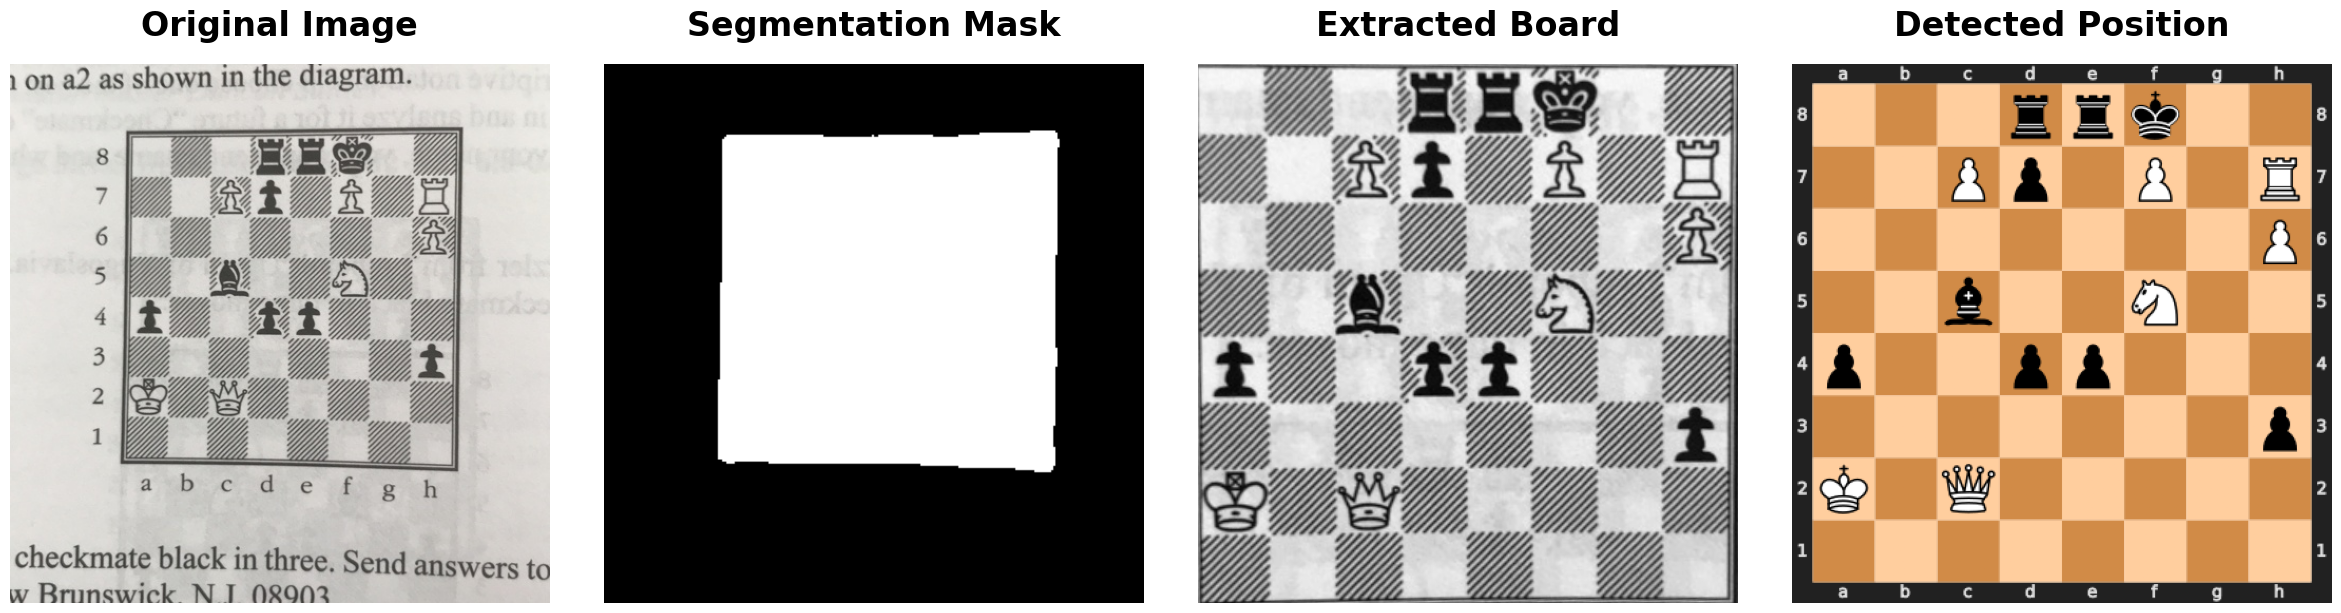

In [6]:
utils.display_comparison(
    img,
    result.board_extraction.binary_mask,
    result.board_extraction.board_image,
    result.position.fen,
)